### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write up, download this file as a PDF or HTML file and submit in the next section.


(1) What is the independent variable? What is the dependent variable?

The independent variable the type of word displayed (congruent or incongruent) and the dependent variable is the response time.

(2) What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

$$\bar{x}: \mbox{refers to sample means of congruent and incongruent condition response times}$$ 

$$H_0: \bar{x}_{congruent} - \bar{x}_{incongruent} = 0$$

The is no difference between the average response times for congruent and incongruent conditions.

$$H_1: \bar{x}_{congruent} - \bar{x}_{incongruent} \neq 0$$
There is a statistically siginificant difference between in the average response times for congruent and incongruent conditions.

For this analysis, I will perform a paired two-tailed t-test since we are analyzing a pair of observations from the same subjects at different periods of time. We also have a small smaple size <30 and population mean and population standard deviation are unknown so a z-test would not work in this situation. We will check the distribution of the differences in means between the 2 sets of observations to address normaility.



(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [3]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

# Perform the analysis here
df = pd.read_csv('stroopdata.csv')
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [4]:
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


The mean response time for incongrument words is greater than that of congruent words at 22 seconds. There seems to be a little bit wider spread of data for incongruent words with a standard deviation of 4.8. Incongruents also have higher max and min values.

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

In [5]:
# Build the visualizations here
#Plot differences 
df['diffs'] = abs(df['Congruent']-df['Incongruent'])

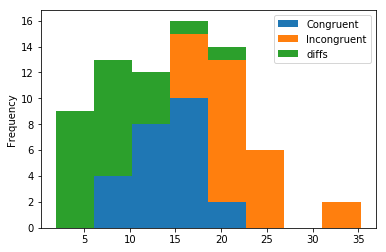

In [36]:
#df.hist(column='diffs',bins=4)
#df.hist(bins=4)
df.plot.hist(stacked=True, bins=8)

Here we have distribution of response type means for each condition. Diffs refers to the difference in means between the 2 condition groups

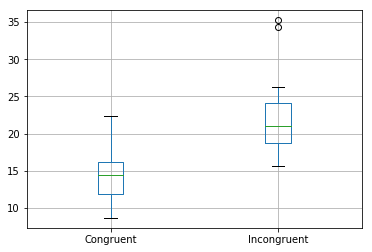

In [28]:
#Box plot
df.boxplot(column=['Congruent', 'Incongruent'])

The box plot shows that subjects under incongruent conditions generally have higher response times than when under congruent conditions. The incongruent box is higher on the plot and the median is also higher. The  incongruent box is slightly taller than the congruent box indicating it has a larger IQR of response times and also has some outliers. The congruent box has longer top whisker which means the data is right skewed.

(5) Now, perform the statistical test and report the results. What is the confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

In [9]:
# Perform the statistical test here
import statsmodels.api as sm


/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [10]:
from scipy import stats
#paired t-test
stats.ttest_rel(df['Incongruent'], df['Congruent'])

Ttest_relResult(statistic=8.020706944109957, pvalue=4.1030005857111781e-08)

In [11]:
#calc dof
dof=df.shape[0]-1
#t-critical value with alpha 0.05 2 sided test
print (stats.t.ppf(1-0.025, dof))

2.06865761042


The confidence level is 95% and the critical value for this 2 sided paired 2 test is 2.07. The p-value is less than the alpha and the test statistic exceeds the critical value at 8.02. Based on the the results of the t-test, I will reject the null hypothesis. There is statistically significant difference between the response times for congruent and incongruent words. This is expected based on my experience with the stroop effect. I would expect slower response times when seeing incongruent words.

## Resources

http://www.biostathandbook.com/pairedttest.html<br>
https://stackoverflow.com/questions/42496508/histogram-on-pandas-column<br>
https://pythonfordatascience.org/paired-samples-t-test-python/<br>
https://www.ck12.org/book/CK-12-Probability-and-Statistics-Concepts/section/4.9/